### Plotly Visualization Tutorial

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [39]:
import plotly.io as pio
#pio.renderers.default='browser' #or
pio.renderers.default = 'png'

#to make static plots use 'png'. 
#other options: 
# Renderers configuration
# -----------------------
#     Default renderer: 'notebook_connected'
#     Available renderers:
#         ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
#          'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
#          'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
#          'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
#          'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [22]:
from plotly import __version__
print(__version__) # 4.14.1

4.14.1


In [23]:
#Get some artifical data
df=pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
df2=pd.DataFrame({'Category':['A','B','C'],
                  'Values':[32,43,50]})

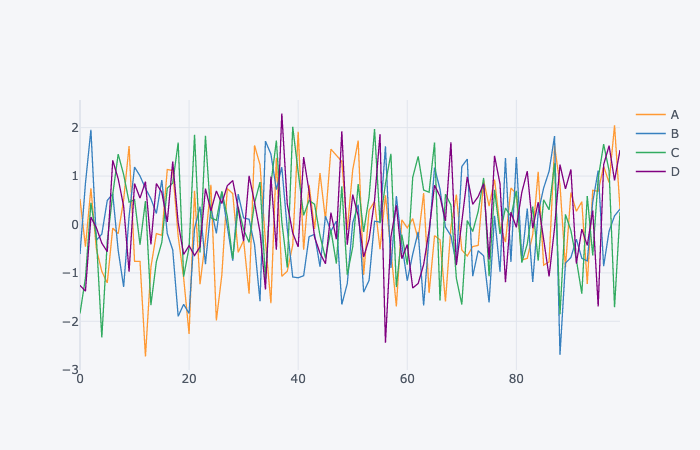

In [24]:
df.iplot()


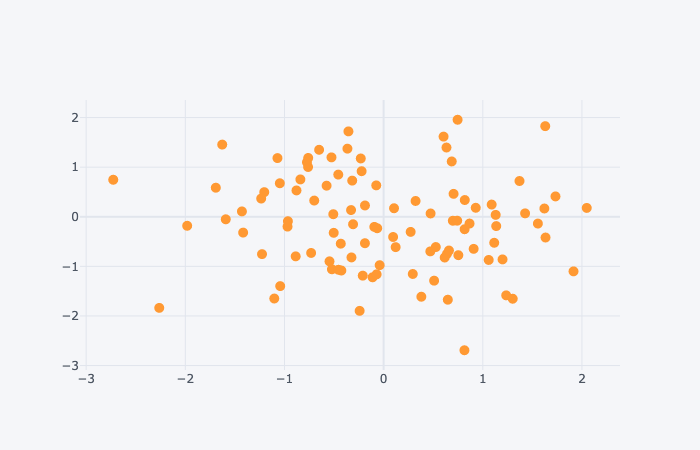

In [25]:
df.iplot(kind='scatter', x='A', y='B',
         mode='markers', size=10)

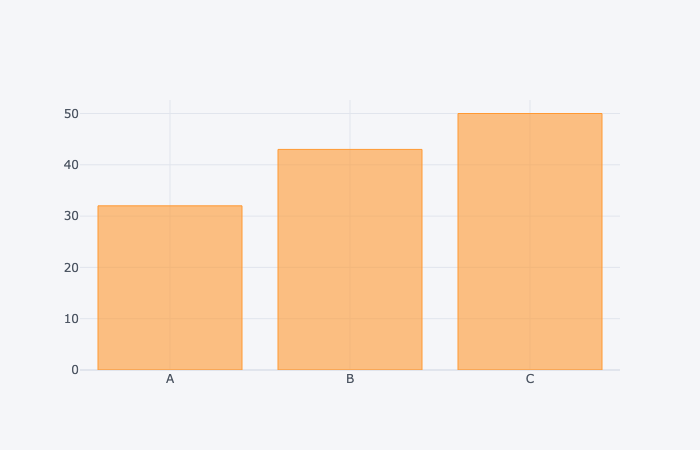

In [26]:
df2.iplot(kind='bar', x='Category', y='Values')

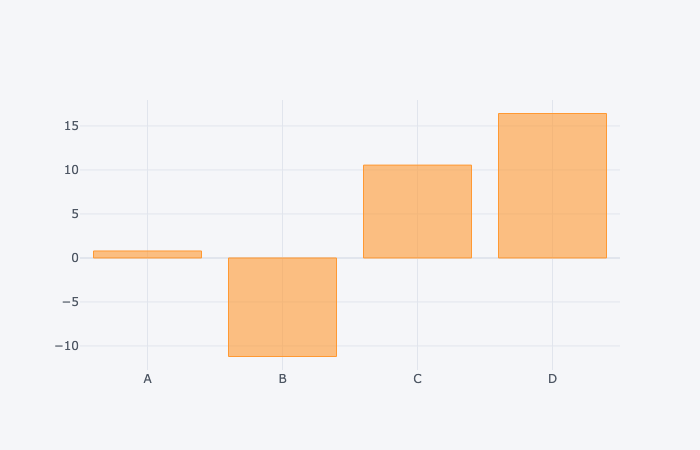

In [27]:
df.sum().iplot(kind='bar')

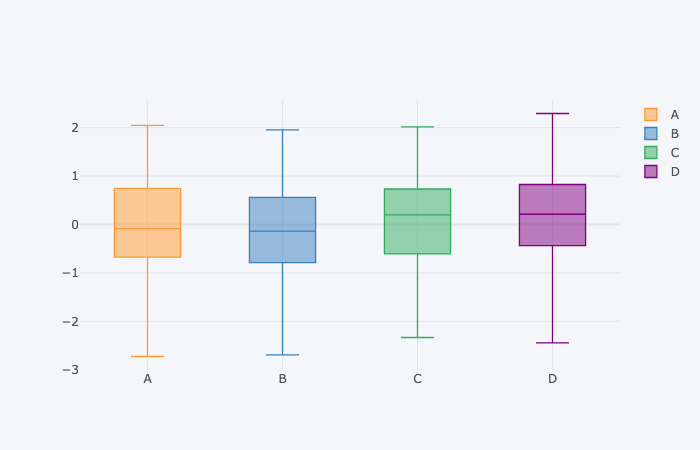

In [28]:
df.iplot(kind='box')

### 3D Plots

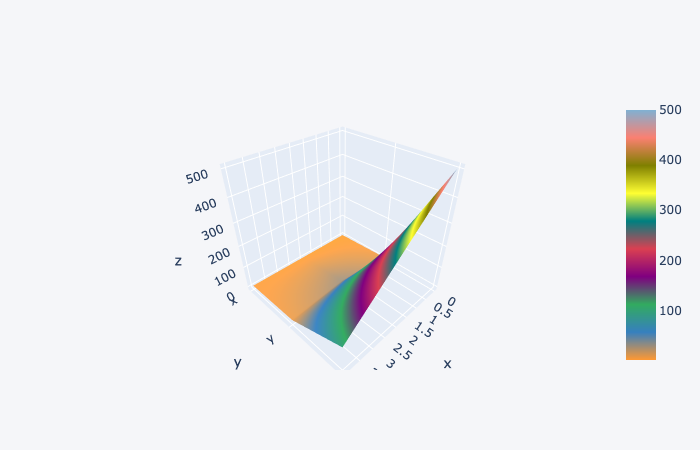

In [29]:
df3=pd.DataFrame({'x':[1,2,3,4,5],
                  'y':[10,20,30,20,10],
                  'z':[500,400,300,200,100]})


df3.iplot(kind='surface')


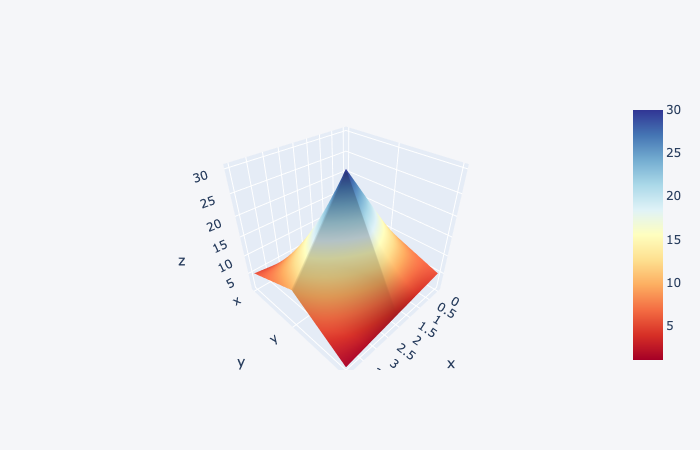

In [30]:
df4=pd.DataFrame({'x':[1,2,3,4,5],
                  'y':[10,20,30,20,10],
                  'z':[5,4,3,2,1]})

df4.iplot(kind='surface', colorscale='rdylbu')

### Hist

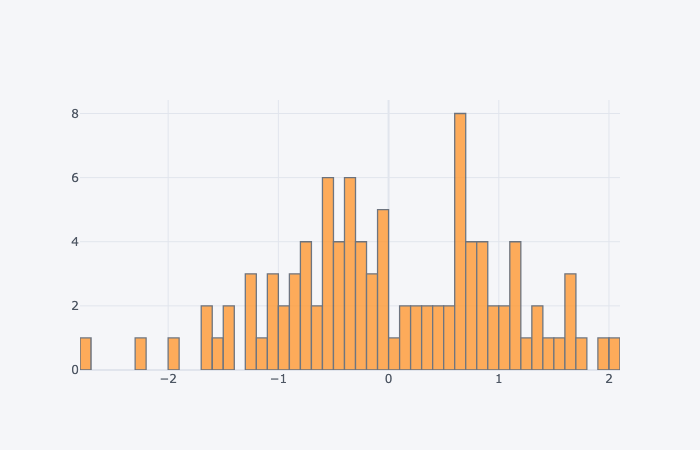

In [31]:
df['A'].iplot(kind='hist', bins=50)



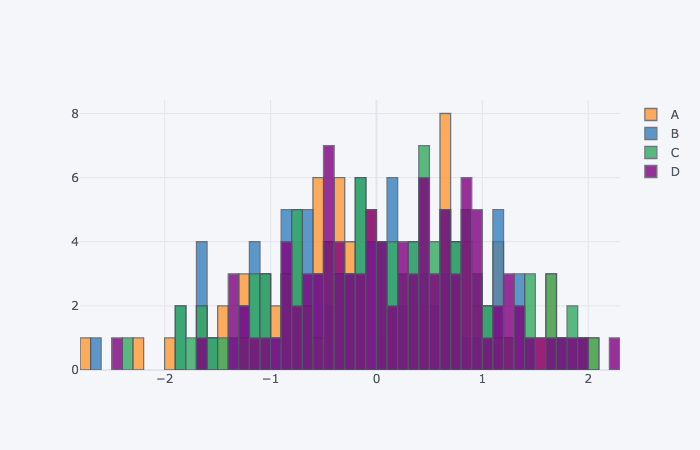

In [32]:
df.iplot(kind='hist', bins=50) #whole dataframe


/Users/oneryigit/opt/anaconda3/lib/python3.8/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/Users/oneryigit/opt/anaconda3/lib/python3.8/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



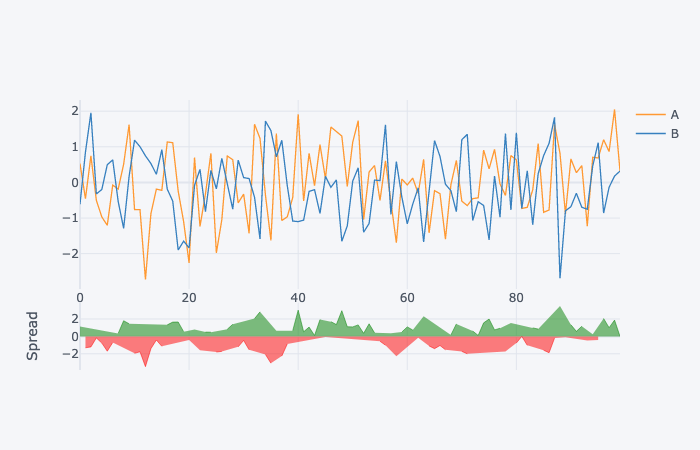

In [33]:
#spread
df[['A','B']].iplot(kind='spread')


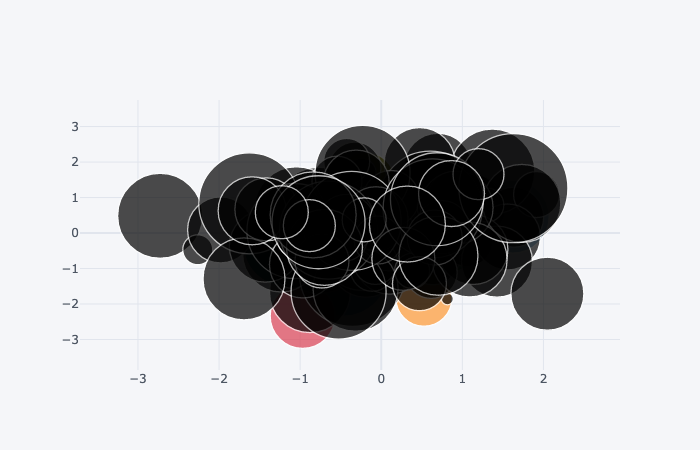

In [34]:
#bubble

df.iplot(kind='bubble', x='A', y='C', size='B')


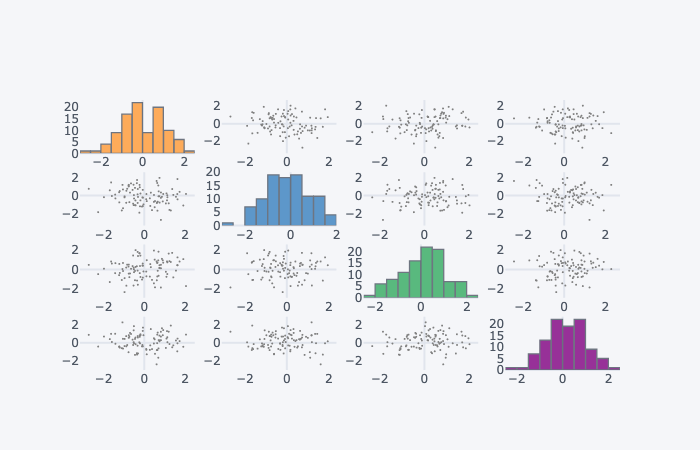

In [35]:
df.scatter_matrix()

### Geo-Plotting

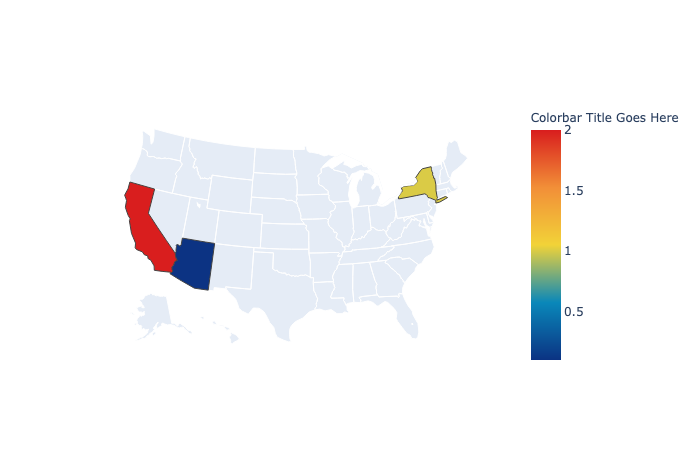

In [36]:
#Choropleth Maps
import plotly.graph_objs as go #add for geo
data=dict(type='choropleth',
          locations=['AZ','CA','NY'],
          locationmode='USA-states',
          colorscale='Portland', #'jet' #'green'
          text=['Text 1', 'Text 2', 'Text 3'],
          z=[0.1,2.0,1.0],
          colorbar={'title':'Colorbar Title Goes Here'})

layout= dict(geo={'scope':'usa'})

choromap=go.Figure(data=[data],layout=layout)
iplot(choromap)



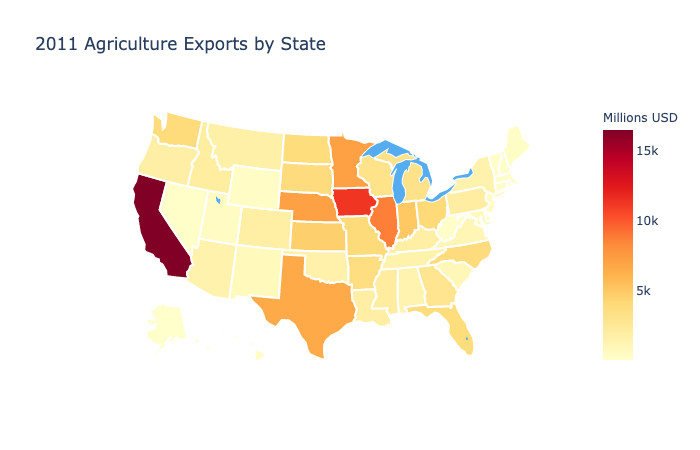

In [37]:

df=pd.read_csv('plotly tutorials/2011_US_AGRI_Exports')

data=dict(type='choropleth',
          colorscale='YlOrRd',
          locations= df['code'],
          locationmode='USA-states',
          z=df['total exports'],
          text=df['text'],
          marker=dict(line=dict(color='rgb(255,255,255)',width=2)),
          colorbar={'title':'Millions USD'}
          )

layout=dict(title='2011 Agriculture Exports by State',
            geo=dict(scope='usa',showlakes=True,
                     lakecolor='rgb(85,173,240)'))

choromap2=go.Figure(data=[data],layout=layout)
iplot(choromap2)

#marker state borders width.


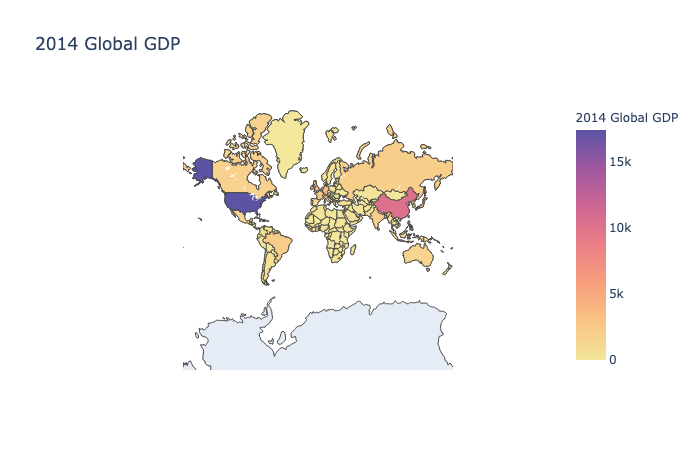

In [38]:

# Geo-World
df=pd.read_csv('plotly tutorials/2014_World_GDP')

data=dict(type='choropleth',
          locations=df['CODE'],
          z=df['GDP (BILLIONS)'],
          text=df['COUNTRY'],
          colorscale='sunset',
          colorbar={'title':'2014 Global GDP'})

layout=dict(title='2014 Global GDP',
            geo=dict(showframe=False,
                     projection={'type':'mercator'}))


choromap3=go.Figure(data=[data], layout=layout)
iplot(choromap3)
